In [37]:
import gym
import minihack
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import sys
from io import StringIO
from minihack import LevelGenerator
from minihack.envs.room import MiniHackRoom15x15
from minihack.envs.corridor import MiniHackCorridor
from minihack.envs.mazewalk import MiniHackMazeWalk9x9


Ora definiamo la funzione che serve per mostrare le mappe create

In [38]:
def render_des_file(des_file):
    env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file)

    obs = env.reset()
    env.render()
    plt.imshow(obs['pixel'][0:1000, 0:1000])

In [39]:
AVAIABLE_OBJECTS=[
'healing',
]

#Armi disponibili dalla più scarsa alla più forte
AVAIABLE_ARROWS=[
'orcish arrow',
'silver arrow',
'arrow',
'elven arrow',
'ya'
]

AVAIABLE_WEAPONS=[
'bullwhip',
'stiletto',
'long sword',
'morning star',
'katana',
]

AVAIABLE_ARMORS=[
'scale mail',
'bronze plate mail', 
'dwarvish mithril-coat',
'elven mithril-coat',
'chain mail'  
]

SYMBOLS=[
'!', #healing potion
')', #arrows
')', #weapons
'[', #armor
]

avaiableitems=['HEALING','ARROWS','WEAPON','ARMOR']


In [40]:
def addobject(lvl: LevelGenerator, seed:int, posx:int ,posy:int,others: [str]):
    #se gli altri sono frecce, arma e armatura, cerco di spawnare un'altra entità di qualità differente
    levelnumber =math.floor(seed/200)
    quality=levelnumber-1
    remainingitems=['HEALING','ARROWS','WEAPON','ARMOR']
    #gestione del caso (ci sono già altri item di questo tipo nello shop)
    for i in others:
        remainingitems.pop(remainingitems.index(i))
    if remainingitems.__len__()==0:
        remainingitems=['HEALING','ARROWS','WEAPON','ARMOR']
        if levelnumber==5:
            quality=quality-1
        else: quality=quality+1
    #a questo punto in remaining items ci sono gli item che possono ancora spawnare, devo scegliere
    #in modo pseudo-casuale (dipende dal seed)
    choice=seed%remainingitems.__len__()
    choosen=remainingitems[choice]
    pos=(posx,posy)
    if choosen=='HEALING':
        choosenitem=AVAIABLE_OBJECTS[0]
        choosensymbol=SYMBOLS[0]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)

    elif choosen=='ARROWS':
        choosenitem=AVAIABLE_ARROWS[quality]
        choosensymbol=SYMBOLS[1]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy))
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy+1))
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=(posx,posy+2))

    elif choosen=='WEAPON':
        choosenitem=AVAIABLE_WEAPONS[quality]
        choosensymbol=SYMBOLS[2]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)

    else:
        choosenitem=AVAIABLE_ARMORS[quality]
        choosensymbol=SYMBOLS[3]
        lvl.add_object(name=choosenitem,symbol=choosensymbol,place=pos)
        
    return choosen
    

Ora definiamo la funzione che filla lo shop con oggetti randomici (dipendenti dal seed inserito).  
Livello 1: 3 (80%), 4 (15%) 5 (5%)  
Livello 2: 3 (50%), 4 (40%) 5 (10%)  
Livello 3: 3 (30%), 4 (50%) 5 (20%)  
Livello 4: 3 (20%), 4 (30%) 5 (50%)  
Livello 5: 3 (5%), 4 (15%) 5 (80%)  


In [41]:

def fillwithobj(lvl: LevelGenerator,seed: int):
    random.seed(seed)
    levelnumber=math.floor(seed/200)

    if levelnumber==1:
        if seed<=360:
            numitem=3
        elif seed<=390:
            numitem=4
        else: 
            numitem=5

    elif levelnumber==2:
        if seed<=500:
            numitem=3
        elif seed<=580:
            numitem=4
        else: 
            numitem=5

    if levelnumber==3:
        if seed<=660:
            numitem=3
        elif seed<=760:
            numitem=4
        else: 
            numitem=5

    if levelnumber==4:
        if seed<=840:
            numitem=3
        elif seed<=900:
            numitem=4
        else: 
            numitem=5

    if levelnumber==5:
        if seed<=1010:
            numitem=3
        elif seed<=1040:
            numitem=4
        else: 
            numitem=5
    others=[]
    numitem=random.randint(3,5)
    #STARTING ITEMS
    if levelnumber==1:
        lvl.add_object(name='bow',symbol=')',place=(2,6)) #METTI ARCO
        lvl.add_object(name='worm tooth',symbol=')',place=(2,5)) #METTI ARMA INIZIALE
        
    if numitem==3:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(4,3))
        else:
            others.append(addobject(lvl,seed,4,3,others))
        others.append(addobject(lvl,seed,6,3,others))
        others.append(addobject(lvl,seed,8,3,others))

    elif numitem==4:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(3,3))
        else:
            others.append(addobject(lvl,seed,3,3,others))
        others.append(addobject(lvl,seed,5,3,others))
        others.append(addobject(lvl,seed,7,3,others))
        others.append(addobject(lvl,seed,9,3,others))

    elif numitem==5:
        if levelnumber==1:
            others=['HEALING']
            lvl.add_object(name='healing',symbol='!',place=(2,3))
        else:
            others.append(addobject(lvl,seed,2,3,others))
        others.append(addobject(lvl,seed,4,3,others))
        others.append(addobject(lvl,seed,6,3,others))
        others.append(addobject(lvl,seed,8,3,others))
        others.append(addobject(lvl,seed,10,3,others))





Infine definiamo la funzione che crea il file des del negozio e lo mostra a schermo.  
Il levelnumber serve per la generazione di livelli dipendenti dal piano a cui è arrivato il personaggio:  
piani più alti->oggetti migliori nello shop e più scelte possibili (probabilità aumentata)


MAZE: "mylevel", ' '
FLAGS:premapped
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
||||||||||||||||  
|..............|  
|...........||||  
|...........|     
|...........|     
|...........|     
|...........|     
|||||||||||||     
ENDMAP
REGION:(0,0,18,8),lit,"ordinary"
#LEVEL: 1
#SEED: 328
BRANCH:(1,6,1,6),(0,5,0,5)
MONSTER:"shopkeeper",(6, 1)
DOOR:closed,(12, 1)
PORTAL:(14,1,14,1), (0,0,0,0),"mylevel"
OBJECT:(')',"bow"),(2, 6)
OBJECT:(')',"worm tooth"),(2, 5)
OBJECT:('!',"healing"),(2, 3)
OBJECT:(')',"bullwhip"),(4, 3)
OBJECT:(')',"orcish arrow"),(6, 3)
OBJECT:(')',"orcish arrow"),(6, 4)
OBJECT:(')',"orcish arrow"),(6, 5)
OBJECT:('[',"scale mail"),(8, 3)
OBJECT:('!',"healing"),(10, 3)
GOLD: 15,(1, 5)


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                 

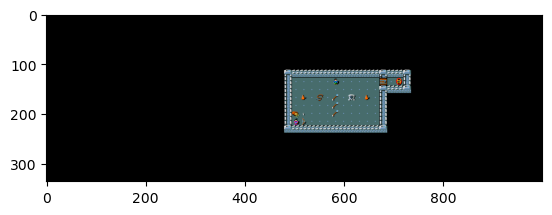

In [94]:

def creashop(levelnumber,startingseed,portalincome):
    map="""||||||||||||||||
|..............|
|...........||||
|...........|    
|...........|    
|...........|   
|...........|     
|||||||||||||"""
    seed=startingseed+200*levelnumber
    lvl=LevelGenerator(map=map,lit=True,flags=['premapped'])
    lvl.add_line("#LEVEL: "+str(levelnumber))
    lvl.add_line("#SEED: "+str(seed))
    lvl.set_start_pos((1,6))
    lvl.add_monster(name='shopkeeper',place=(6,1))
    lvl.add_door("closed", place=(12,1))

    lvl.add_line("PORTAL:(14,1,14,1), ("+str(portalincome[0])+","+str(portalincome[1])+","+str(portalincome[0])+","+str(portalincome[1])+"),\"mylevel\"")
    fillwithobj(lvl,seed)
    if levelnumber==1:
        startinggold=15 #METTI SOLDI INIZIALI (DA VEDERE ANCORA QUANTI)
        lvl.add_line("GOLD: "+str(startinggold)+",(1, 5)") #PRIMA AMOUNT POI COORDINATE
    
    return lvl.get_des()
#il starting seed va definito in questo modo (un numero da 0 a 200), 
#stesso seed -> stessa serie di livelli    
startingseed=random.randint(0,200)
#questa funzione restituisce il file des valido dello shop
#CAMBIARE LEVELNUMBER PER UN LIVELLO DIVERSO
levelnumber=1
shop=creashop(levelnumber,startingseed,(0,0))
print(shop)
render_des_file(shop)

In questa sezione mostriamo come generiamo il battlefield, la zona in cui il nostro agente troverà oro e mostri a difenderlo.
Per il battlefield abbiamo scelto 5 mappe possibili per ogni livello con una generazione di mostri e monete casuale, l'obbiettivo è spawnare vicino a mostri più forti più monete e vicino a quelli deboli poche monete.
In ogni possibile livello può capitare:  
-Boss room, dove sarà presente un solo nemico, il più forte per quel livello che difenderà tante monete.  
-Maze room, l'agente dovrà eseguire del pathfinding per trovare l'uscita e i gold, sparsi casualmente all'interno del livello  
-Room, una stanza aperta con nemici e monete spawnate nelle vicinanze  
-Mini boss room: la stanza mostrata durante la presentazione, miniboss a difendere tanti gold, nemici a difendere l'uscita e altri nemici a difendere i gold  
-BONUS ROOM: una stanza molto rara, (1/100) dove saranno presenti solo monete, un Coridor

Ora aggiungiamo le uniche due mappe custom che utilizziamo, la miniboss room e la boss room.

In [95]:
minibossmap="""                    ||||||||||||
                    |..........|
                    |.||||||...|
                    |.|........|
                    |.|||||....|
                    |.....|....|
                    |||||||....|
                    |..........|
                    |.|||||....|
                    |.|...|....|
                    |.|...|....|
                    |.|...|....|
                    |||.||||...|
                    |......|...|
                    |......|...|
                    |..........|
                    |......|...|
                    ||||||||||||"""

riferimentiminibossmap="""
STAIR:(10, 1),down
soldi (5 gold)
MONSTER: random, random, (3,10)
MONSTER: random, random, (4,10)
MONSTER: random, random, (5,10)
MONSTER: random, random, (5,5)
nemici deboli 
MONSTER: random, random, (9,1)
MONSTER: random, random, (10,2)
MONSTER: random, random, (1,3)
miniboss
MONSTER: random, random, (3,14)
porta
MONSTER: random, random, (3,12)
"""




bossmap="""                          |||||      
                          |...|      
                          |...|      
                    ||||||||.||||    
                    |...|.......|    
                    |...|.......|||||
                    |...|.......|...|
                    |...............|
                    |...|.......|...|
                    |...|.......|||||
                    |...|.......|    
                    |||||||||||||"""    

riferimentibossroom="""
scale:(8, 1),down
spawn: (1,7,1,7),(2,8,2,8)
porte
sinistra: random, random, (4,7)
su: random, random, (8,3)
destra: random, random, (12,7)

boss: random, random, (9,7)
"""

roommap="""                    |||||||||||||||
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |||||||||||||||"""

mazebasemap="""                    |||||||||||||||||||||||||
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |||||||||||||||||||||||||"""

bonusroommap="""                    |||||||
                    |.....|
                    |.....|
                    |.....|
                    |||||||"""





Ora prendiamo le mappe dagli env predefiniti e definiamo la generazione.  
La prima è la bonus room, un piccola stanza con 15 gold nel punto di arrivo.


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                              -------                           
                                              |@..>.|                           
                           

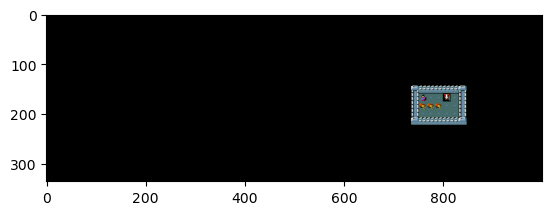

In [96]:
def bonusroom():
    lvl=LevelGenerator(lit=True,flags=['premapped'],map=bonusroommap)
    lvl.wallify()
    lvl.set_start_pos((21,1))
    lvl.add_stair_down(place=(24,1))
    lvl.add_line("GOLD: 5,(21,2)")
    lvl.add_line("GOLD: 5,(22,2)")
    lvl.add_line("GOLD: 5,(23,2)")
    
    return lvl.get_des()

render_des_file(bonusroom())


Boss room: una stanza con un nemico più potente del normale e una stanza con 20 gold per la sua sconfitta.


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                              -----                             
                                              |.>.|                             
                                              |...|                             
                                        --------+----                           
                                        |...|.......|                           
                                        |...|.......|----                       
                           

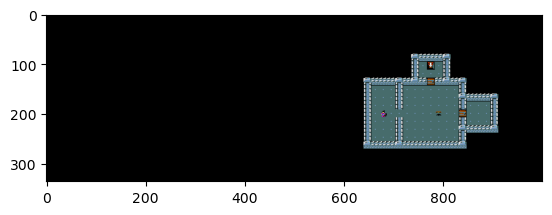

In [97]:
def bossroomdes(levelnumber):
    lvl=LevelGenerator(map=bossmap,lit=True,flags=['premapped'])
    lvl.set_start_pos((22,7))
    lvl.add_stair_down(place=(28, 1))
    lvl.add_door("closed", place=(28,3))
    lvl.add_door("closed", place=(32,7))

    lvl.add_line("GOLD: 5,(34,7)")
    lvl.add_line("GOLD: 5,(35,6)")
    lvl.add_line("GOLD: 5,(35,7)")
    lvl.add_line("GOLD: 5,(35,8)")
    #AGGIUNGI IL BOSS (9,7)
    lvl.add_monster(name='bat',place=(29,7))
    
    return lvl.get_des()

render_des_file(bossroomdes(1))

Mini boss room: la stanza mostrata nella presentazione, la più probabile, mob da battere obbligatoriamente per passare e miniboss a scelta per ottenere più monete.


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                            ------------                        
                                            |......+..>|                        
                                            |.------...|                        
                                            |.|........|                        
                                            |.-----....|                        
                                            |.....|....|                        
                                            |------....|                        
                                            |..........|                        
                           

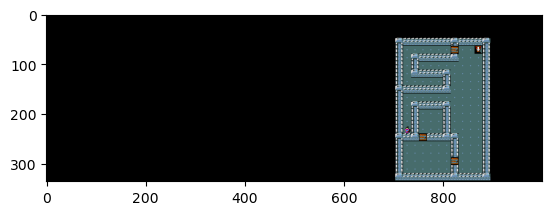

In [98]:
def minibossroomdes(levelnumber):
    lvl=LevelGenerator(map=minibossmap,lit=True,flags=['premapped'])
    lvl.set_start_pos((21,11))
    lvl.add_stair_down(place=(30, 1))
    
    #ZONA MOB
    #MOSTRI (8,1) (9,2) (10,3)
    
    lvl.add_door("closed", place=(27,1))
    #MOB (1,1)
    lvl.add_line("GOLD: 5,(25,5)")


    #ZONA MINIBOSS
    #MINIBOSS STA A (3,13)
    lvl.add_door("closed", place=(23,12))
    lvl.add_door("closed", place=(27,15))
    #MINIBOSS REWARD
    lvl.add_line("GOLD: 5,(23,10)")
    lvl.add_line("GOLD: 5,(24,10)")
    lvl.add_line("GOLD: 5,(25,10)")
    #lvl.add_line("GOLD: 5,(15,8)")
    return lvl.get_des()
render_des_file(minibossroomdes(1))

Common room: stanza senza ostacoli, mob sparsi (pseudo)casualmente e 20 gold sparsi.


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                          ---------------                       
                                          |..........B.>|                       
                                          |.$...........|                       
                                          |......B......|                       
                                          |.............|                       
                                          |....B........|                       
                           

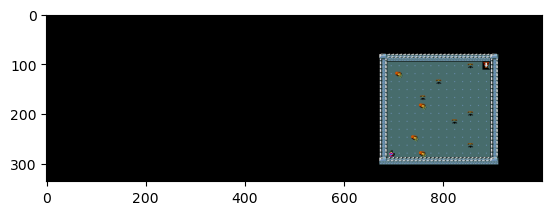

In [108]:
def roomroomdes(seed,levelnumber):
    lvl=LevelGenerator(map=roommap,lit=True,flags=['premapped'])
    lvl.set_start_pos((21,12))
    lvl.add_stair_down(place=(33, 1))
    #AGGIUNGI MOB RANDOMICAMENTE
    random.seed(seed)

    #RANDOMICITÀ MUTUALMENTE ESCLUSIVA----- 
    pseudoarray=[]
    for i in range(1,13):
        pseudoarray.append(i)
    pseudomatrix=[]
    for i in range(0,10):
        pseudomatrix.append(pseudoarray)
    temporaryseed=seed
    def pseudorandompos (seed:(int))->(int,int):
        random.seed(seed)
        a=random.randint(0,9)
        b=random.choice(pseudomatrix[a])
        pseudomatrix[a].pop(pseudomatrix[a].index(b))
        return (a+22,b)
    #-------------------------------    

    for i in range(0,4):
        lvl.add_line("GOLD: 5,"+str(pseudorandompos(temporaryseed)))
        temporaryseed=temporaryseed+1

    for i in range(0,6):
        #AGGIUNGI MOB IN BASE AL LIVELLO
        lvl.add_monster(name='bat',place=pseudorandompos(temporaryseed))
        temporaryseed=temporaryseed+1
  
    return lvl.get_des()

render_des_file(roomroomdes(1,1))
print(roomroomdes(1,1))



Maze room: pathfinding in un piccolo labirinto, all'arrivo sono presenti 15 gold come ricompensa.


MAZE: "mylevel", ' '
FLAGS:premapped
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
                    |||||||||||||||||||||||||
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |.                     .|
                    |||||||||||||||||||||||||
ENDMAP
REGION:(0,0,45,13),lit,"ordinary"
BRANCH:(21,4,21,4),(20,3,20,3)
STAIR:(43, 4),down
MAZEWALK:(21,4),east
MONSTER:"bat",(43, 3)
MONSTER:"bat",(43, 2)
MONSTER:"bat",(43, 8)
MONSTER:"bat",(43, 9)
GOLD: 5,(43,5)
GOLD: 5,(43,6)
GOLD: 5,(43,7)
WALLIFY


You are lucky!  Full moon tonight.                        

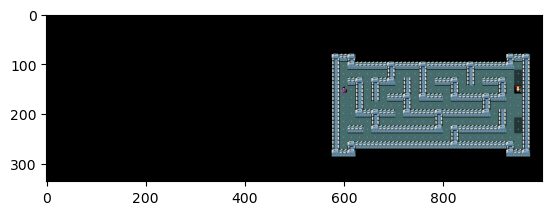

In [125]:

def mazeroomdes():
    lvl=LevelGenerator(map=mazebasemap,lit=True,flags=['premapped'])
    lvl.set_start_pos((21,4))

    lvl.add_stair_down(place=(43, 4))
    
    lvl.add_mazewalk(coord=(21,4), dir='east')

    lvl.add_monster("bat",place=(43,3))
    lvl.add_monster("bat",place=(43,2))
    lvl.add_monster("bat",place=(43,8))
    lvl.add_monster("bat",place=(43,9))

    lvl.add_line("GOLD: 5,(43,5)")
    lvl.add_line("GOLD: 5,(43,6)")
    lvl.add_line("GOLD: 5,(43,7)")
    lvl.wallify()
    return lvl.get_des()

print(mazeroomdes())
render_des_file(mazeroomdes())


Ora si generano i battlefield sempre in base al seed, come negli shop, questa volta con le seguenti probabilità:  
Common Room = 50% | Miniboss Room = 30% | Boss Room = 10% | Maze Room = 9,5% | Bonus Room=0,5%  
Nel primo livello è assicurata una Room e nell'ultimo una Boss Room.



In [110]:
def creabattlefield(levelnumber:int ,startingseed:int ):
    if levelnumber==1:
        return roomroomdes(startingseed, levelnumber)
    elif levelnumber==5:
        return bossroomdes(5)
    else:
        random.seed(startingseed*levelnumber)
        choice=random.randint(0,200)
        if(choice<=100):
            return roomroomdes(startingseed,levelnumber)
        elif(choice<=160):
            return minibossroomdes(levelnumber)
        elif(choice<=180):
            return bossroomdes(levelnumber)
        elif(choice<=199):
            return mazeroomdes()
        else:
            return bonusroom
    
#UTILIZZARE UN SEED COMPRESO TRA 0 e 200 (lo stesso utilizzato per lo shop).
creabattlefield(1,1)

'\nMAZE: "mylevel", \' \'\nFLAGS:premapped\nINIT_MAP: solidfill,\' \'\nGEOMETRY:center,center\nMAP\n                    |||||||||||||||\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |.............|\n                    |||||||||||||||\nENDMAP\nREGION:(0,0,35,14),lit,"ordinary"\nBRANCH:(21,12,21,12),(20,11,20,11)\nSTAIR:(33, 1),down\nGOLD: 5,(24, 10)\nGOLD: 5,(22, 2)\nGOLD: 5,(25, 12)\nGOLD: 5,(25, 6)\nMONSTER:"bat",(31, 7)\nMONSTER:"bat",(31, 11)\nMONSTER:"bat",(27, 3)\nMONSTER:"bat",(25, 5)\nMONSTER:"bat",(29, 8)\nMONSTER:"bat",(31, 1)\n'

TODO: AGGIUNGERE MOB, MINIBOSS E BOSS CHE DIPENDONO DAL LIVELLO, NON TUTTI PIPISTRELLI  
SISTEMARE POZIONI  
ADDA MOSTRI ALLA FINE DEL MAZE


Parte di Merging delle due mappe, ora devo:  

-Una volta che ho il file del battlefield devo togliere la riga BRANCH( quella dello spawn)  

-Generare lo shop dandogli come argomento lo stesso seed, livello, e destinazione del portale

-Ritornare file des finale.


In [111]:
def takemap(desfile: str):
    dessplittato=desfile.split('\n')
    j=0
    for i in dessplittato:
        if i=="MAP":
            break
        else:
            j=j+1
    dessplittato=dessplittato[j+1:]
    l=0
    for k in dessplittato:
        if k=="ENDMAP":
            break
        else:
            l=l+1
    dessplittato=dessplittato[:l]
    return '\n'.join(dessplittato)

def mapmerger(shopmap:str,bfdmap:str):
    cleanbfd=(bfdmap)
    cleanbfdlist=cleanbfd.split('\n')
    cleanlines=[]
    for i in cleanbfdlist:
        cleanlines.append(i[18:])
    cleanshop=(shopmap)
    cleanshoplist=cleanshop.split('\n')
    cleanlen=cleanshoplist.__len__()
    finalmap=[]
    k=0
    for j in cleanlines:
        if k<cleanlen:
            finalmap.append(cleanshoplist[k]+j)
        else:
            finalmap.append("                  "+j)
        k=k+1
    cleanlines=[]
    return('\n'.join(finalmap))


#ESEMPI DI UTILIZZO DEL MAP MERGING
print(mapmerger(takemap(creashop(1,1,(0,0))),takemap(bonusroom())))
print('\n\n\n')
print(mapmerger(takemap(creashop(2,2,(0,0))),takemap(bossroomdes(2))))
print('\n\n\n')
print(mapmerger(takemap(creashop(3,2,(0,0))),takemap(minibossroomdes(3))))
print('\n\n\n')
print(mapmerger(takemap(creashop(4,2,(0,0))),takemap(roomroomdes(2,4))))
print('\n\n\n')
print(mapmerger(takemap(creashop(4,2,(0,0))),takemap(roomroomdes(2,4))))

||||||||||||||||    |||||||
|..............|    |.....|
|...........||||    |.....|
|...........|       |.....|
|...........|       |||||||




||||||||||||||||          |||||      
|..............|          |...|      
|...........||||          |...|      
|...........|       ||||||||.||||    
|...........|       |...|.......|    
|...........|       |...|.......|||||
|...........|       |...|.......|...|
|||||||||||||       |...............|
                    |...|.......|...|
                    |...|.......|||||
                    |...|.......|    
                    |||||||||||||    




||||||||||||||||    ||||||||||||
|..............|    |..........|
|...........||||    |.||||||...|
|...........|       |.|........|
|...........|       |.|||||....|
|...........|       |.....|....|
|...........|       |||||||....|
|||||||||||||       |..........|
                    |.|||||....|
                    |.|...|....|
                    |.|...|....|
                    |.|...|....|


Dopo aver unito le mappe estraiamo il branch dal battlefield, lo utilizziamo com destinazione del portal e otteniamo la mappa finale.


MAZE: "mylevel", ' '
FLAGS:premapped
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
||||||||||||||||    |||||||||||||||
|..............|    |.............|
|...........||||    |.............|
|...........|       |.............|
|...........|       |.............|
|...........|       |.............|
|...........|       |.............|
|||||||||||||       |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |.............|
                    |||||||||||||||
ENDMAP
REGION:(0,0,35,14),lit,"ordinary"
REGION:(0,0,18,8),lit,"ordinary"
#LEVEL: 1
#SEED: 220
BRANCH:(1,6,1,6),(0,5,0,5)
MONSTER:"shopkeeper",(6, 1)
DOOR:closed,(12, 1)
PORTAL:(14,1,14,1), (21,12,21,12),"mylevel"
OBJECT:(')',"bow"),(2, 6)
OBJECT:(')',"worm tooth"),(2, 5)
OBJECT:('!',"healing"),(2, 3)
OBJECT:(')',"bullwhip"),(4, 3)
OBJECT:(')',"orcish arrow"),(6, 3)
OBJECT:(')',"orcish arrow"),(6, 4)
OBJ

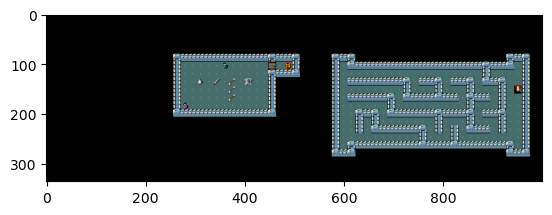

In [124]:

#Funzione per estrarre la destinazione del portal
def portalextractor(bfddes:str)->(str,(int,int)):
    bfdsplitted=bfddes.split('\n')
    for i in bfdsplitted:
        if "BRANCH" in i:
            branchsplittato=(i[7:].split(','))
            portalx=branchsplittato[2]
            portaly=branchsplittato[1]
            bfdsplitted.pop(bfdsplitted.index(i))
            return(('\n'.join(bfdsplitted)),(portalx,portaly))

#Funzione per estrarre gli header (spawn dei mostri, delle monete e degli oggetti)
def headerextractor(desfile:str):
    #prendo tutto quello che c'è da ENDMAP in poi, lo metto in una sola stringa, 
    dessplitted=desfile.split('\n')
    k=0
    for j in dessplitted:
        if "ENDMAP" in j:
            break
        else:
            k=k+1
    finale="\n".join(dessplitted[k+1:])
    return finale

def completemapdes(levelnumber,startingseed):
    battlefield=creabattlefield(levelnumber,startingseed)
    portal=portalextractor(battlefield)
    battlefield=portal[0]
    portallocation=portal[1]
    battlefieldheader=headerextractor(battlefield)
    shop=creashop(levelnumber,startingseed,portallocation)
    shopheader=headerextractor(shop)
    #devo: unire le mappe, unire gli header, la parte sopra invariata
    lvl=LevelGenerator(map=mapmerger(takemap(shop),takemap(battlefield)),lit=True,flags=['premapped'])
    lvl.add_line(shopheader)
    lvl.add_line(battlefieldheader)
    return lvl.get_des()



print(completemapdes(1,20))

render_des_file(completemapdes(3,28))



PER CREARE UN NUOVO LIVELLO COMPLETO SCRIVERE LA FUNZIONE completemapdes(1,20)